# Convolutional Neural Network (CNN)

In [1]:

import tensorflow as tf

from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

## Télécharger les données CIFAR100 

Nous avons appliquer le même modèle sur un ensemble de données différent qui est cifar 100 de keras;
ces données sont un mélange des images des objets et des animaux, insects ... de type RGB,on les divise en 50000 images pour la formation  et 10000 images de test, on souhaite appliquer la classification sur ces images tel que nous avons 100 classes .

In [2]:
(train_images, train_labels), (test_images, test_labels) =datasets.cifar100.load_data()

# Normalize pixel values to be between 0 and 1
train_images, test_images = train_images / 255.0, test_images / 255.0

## Verify the data

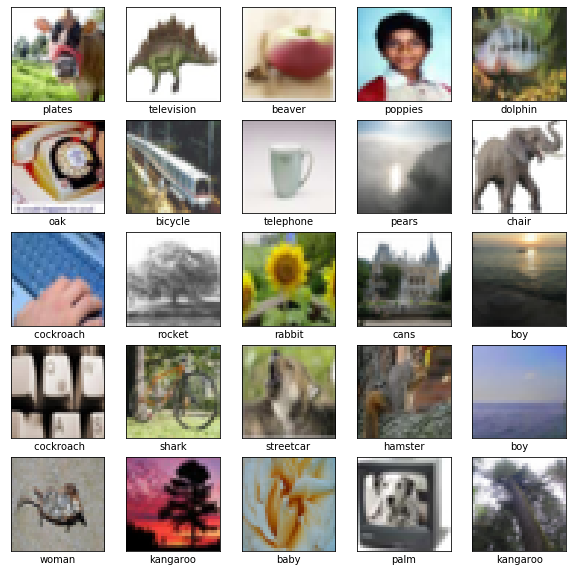

In [5]:
subclass_names = ['beaver', 'dolphin', 'otter', 'seal', 'whale','aquarium fish', 'flatfish', 'ray', 'shark', 'trout','orchids', 'poppies', 'roses', 'sunflowers', 'tulips','bottles', 'bowls', 'cans', 'cups', 'plates','apples', 'mushrooms', 'oranges', 'pears', 'sweet peppers','clock', 'computer keyboard', 'lamp', 'telephone', 'television','bed', 'chair', 'couch', 'table', 'wardrobe','bee', 'beetle', 'butterfly', 'caterpillar',' cockroach','bear', 'leopard', 'lion', 'tiger', 'wolf','bridge', 'castle', 'house', 'road', 'skyscraper','cloud', 'forest', 'mountain', 'plain', 'sea','camel', 'cattle', 'chimpanzee', 'elephant', 'kangaroo','fox', 'porcupine', 'possum', 'raccoon', 'skunk','crab', 'lobster', 'snail', 'spider', 'worm','baby', 'boy', 'girl', 'man', 'woman','crocodile', 'dinosaur', 'lizard', 'snake', 'turtle','hamster', 'mouse', 'rabbit', 'shrew', 'squirrel','maple', 'oak', 'palm', 'pine',' willow','bicycle', 'bus', 'motorcycle', 'pickup truck', 'train','lawn-mower', 'rocket', 'streetcar', 'tank', 'tractor']
#len(subclass_names)
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    # The CIFAR labels happen to be arrays, 
    # which is why you need the extra index
    plt.xlabel(subclass_names[train_labels[i][0]])
plt.show()

## Create the convolutional base


On applique le modèle de base convolutionnel, application d'une pile de Conv2D pour l'application des filtres et MaxPooling2D pour réduire les dimensions spatiales de l'image d'entrée.  

In [6]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

In [7]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 30, 30, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 13, 13, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 6, 6, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 4, 4, 64)          36928     
Total params: 56,320
Trainable params: 56,320
Non-trainable params: 0
_________________________________________________________________


plus qu'on approfondit dans notre réseau on augmente le nbre de filtres  et on réduit ses dimensions.


##  L'ajout des couches denses

* On complète notre modèle , on a utilise les paramètres obtenus par le modèle convolutionnel de base  (4,4,64)
* On ajoute une couche cachée dont le nbre de neurones égale à 64.
* La dernière couche de sortie a comme fonction d'activation par défaut "softmax" car on a une classification qui n'est pas binaire (100 classes).

In [14]:
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(100))

nous avons maintenant le modèle complet 

In [9]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 30, 30, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 13, 13, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 6, 6, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 4, 4, 64)          36928     
_________________________________________________________________
flatten (Flatten)            (None, 1024)              0         
_________________________________________________________________
dense (Dense)                (None, 64)                6

In [10]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 30, 30, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 13, 13, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 6, 6, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 4, 4, 64)          36928     
_________________________________________________________________
flatten (Flatten)            (None, 1024)              0         
_________________________________________________________________
dense (Dense)                (None, 64)                6

## Compiler et former le modèle


In [11]:
model.compile(optimizer='ADAM',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history = model.fit(train_images, train_labels, epochs=10,
                     validation_data=(test_images, test_labels))

Epoch 1/10
1563/1563 [==============================] - 63s 41ms/step - loss: 3.9630 - accuracy: 0.0925 - val_loss: 3.6075 - val_accuracy: 0.1504
Epoch 2/10
1563/1563 [==============================] - 61s 39ms/step - loss: 3.3423 - accuracy: 0.1923 - val_loss: 3.1507 - val_accuracy: 0.2281
Epoch 3/10
1563/1563 [==============================] - 60s 38ms/step - loss: 3.0171 - accuracy: 0.2523 - val_loss: 2.9582 - val_accuracy: 0.2600
Epoch 4/10
1563/1563 [==============================] - 60s 38ms/step - loss: 2.8260 - accuracy: 0.2915 - val_loss: 2.8509 - val_accuracy: 0.2903
Epoch 5/10
1563/1563 [==============================] - 61s 39ms/step - loss: 2.6982 - accuracy: 0.3167 - val_loss: 2.7481 - val_accuracy: 0.3121
Epoch 6/10
1563/1563 [==============================] - 60s 38ms/step - loss: 2.5864 - accuracy: 0.3414 - val_loss: 2.7321 - val_accuracy: 0.3175
Epoch 7/10
1563/1563 [==============================] - 61s 39ms/step - loss: 2.5000 - accuracy: 0.3570 - val_loss: 2.6659 -

## Evaluer le modèle

313/313 - 3s - loss: 2.6367 - accuracy: 0.3399


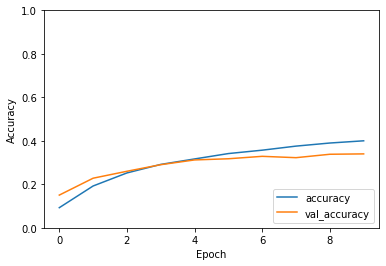

In [12]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

In [13]:

print(test_acc)

0.3398999869823456


 On a l'accuracy égale 0.33 qui est plus petit que l'accuracy de cifar100 (70%).après une comparaison avec les données de cifar10 , on constate que si on applique le modèle sur un dataset dont le nbre de classes est assez grand l'accuracy va être diminué 